In [14]:
import pandas as pd
import pandas_datareader as pdr 
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.optimize import minimize
import scipy.optimize as opt
import seaborn as sns
import networkx as nx
import datetime
import seaborn as sns
from scipy.stats import spearmanr
from scipy.stats import pearsonr


# 1 Data collection, splitting, asset classes 

In [15]:
ticker_df = pd.read_csv('nasdaq_screener_1686671592339.csv')
tickers = list(ticker_df['Symbol'].values)
tickers = tickers[0:500]

In [16]:
format_string = "%Y-%m-%d"
training_start_date = "2010-01-03"
training_end_date = "2021-01-01"
testing_start_date = '2021-01-03'
testing_end_date = '2023-04-01'
#tickers = ['IAU','AMZN','MSFT','AAPL', 'AMD']

In [17]:
sp = yf.download(tickers[4:5], training_start_date ,training_end_date )
for date in sp.index:
    print(date)

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00
2010-01-05 00:00:00
2010-01-06 00:00:00
2010-01-07 00:00:00
2010-01-08 00:00:00
2010-01-11 00:00:00
2010-01-12 00:00:00
2010-01-13 00:00:00
2010-01-14 00:00:00
2010-01-15 00:00:00
2010-01-19 00:00:00
2010-01-20 00:00:00
2010-01-21 00:00:00
2010-01-22 00:00:00
2010-01-25 00:00:00
2010-01-26 00:00:00
2010-01-27 00:00:00
2010-01-28 00:00:00
2010-01-29 00:00:00
2010-02-01 00:00:00
2010-02-02 00:00:00
2010-02-03 00:00:00
2010-02-04 00:00:00
2010-02-05 00:00:00
2010-02-08 00:00:00
2010-02-09 00:00:00
2010-02-10 00:00:00
2010-02-11 00:00:00
2010-02-12 00:00:00
2010-02-16 00:00:00
2010-02-17 00:00:00
2010-02-18 00:00:00
2010-02-19 00:00:00
2010-02-22 00:00:00
2010-02-23 00:00:00
2010-02-24 00:00:00
2010-02-25 00:00:00
2010-02-26 00:00:00
2010-03-01 00:00:00
2010-03-02 00:00:00
2010-03-03 00:00:00
2010-03-04 00:00:00
2010-03-05 00:00:00
2010-03-08 00:00:00
2010-03-09 00:00:00
2010-03-10 00:00:00
2010-03-11 

2020-03-30 00:00:00
2020-03-31 00:00:00
2020-04-01 00:00:00
2020-04-02 00:00:00
2020-04-03 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00
2020-05-01 00:00:00
2020-05-04 00:00:00
2020-05-05 00:00:00
2020-05-06 00:00:00
2020-05-07 00:00:00
2020-05-08 00:00:00
2020-05-11 00:00:00
2020-05-12 00:00:00
2020-05-13 00:00:00
2020-05-14 00:00:00
2020-05-15 00:00:00
2020-05-18 00:00:00
2020-05-19 00:00:00
2020-05-20 00:00:00
2020-05-21 00:00:00
2020-05-22 00:00:00
2020-05-26 00:00:00
2020-05-27 00:00:00
2020-05-28 00:00:00
2020-05-29 00:00:00
2020-06-01 00:00:00
2020-06-02 00:00:00
2020-06-03 00:00:00
2020-06-04 00:00:00
2020-06-05 00:00:00
2020-06-08 00:00:00
2020-06-09 00:00:00


In [18]:
def get_data(tickers,start_date,end_date):
    number_of_tickers = len(tickers )
    price_list_df = []
    daily_returns_list_df = []
    format_string = "%Y-%m-%d"
    start_date_datetime = pd.Timestamp(start_date)#datetime.datetime.strptime(start_date, format_string).date()
    end_date_datetime = pd.Timestamp(end_date)#datetime.datetime.strptime(end_date, format_string).date() 
    for index,ticker in enumerate(tickers) :
        print(index,len(tickers))
        sp = yf.download(ticker, start =start_date , end = end_date )
        if len(sp) >0:
            sp_mod = sp[["Adj Close"]].copy()
            sp_mod.loc[:,"Daily Return"] = sp_mod["Adj Close"] / sp_mod["Adj Close"].shift(1) - 1
            sp_mod[ticker] = sp_mod['Adj Close']
            min_date = sp_mod[ticker].index[0]
            max_date = sp_mod[ticker].index[-1]
            print(min_date,start_date_datetime)
            print(max_date,end_date_datetime)
            if (min_date == start_date_datetime + datetime.timedelta(days =1)) and (max_date == end_date_datetime - datetime.timedelta(days=1)):
                price_list_df.append(sp_mod[[ticker]].copy())
                sp_mod[ticker] = sp_mod['Daily Return']
                daily_returns_list_df.append(sp_mod[ticker])
    if len(price_list_df) > 0:
        price_df = pd.concat(price_list_df,axis=1).dropna()
        daily_returns_df = pd.concat(daily_returns_list_df,axis=1).dropna()
    else:
        price_df = []
        daily_returns_df = []
    return price_df, daily_returns_df

In [19]:
price_df_train, daily_returns_df_train = get_data(tickers,training_start_date,training_end_date)
price_df_train

0 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
1 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACI: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
2 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACIW: Period 'max' is invalid, must be one of ['1d', '5d']
3 500
[*********************100%***********************]  1 of 1 completed
2018-02-16 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
4 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
5 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
6 500
[*********************100%********************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACON: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
52 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACONW: Period 'max' is invalid, must be one of ['1d', '5d']
53 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
54 500
[*********************100%***********************]  1 of 1 completed
2015-10-06 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
55 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACRV: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
56 500
[*********************100%***********************]  1 of 1 completed
2011-02-11 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
57 500
[*********************100%****

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
103 500
[*********************100%***********************]  1 of 1 completed
2020-08-12 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
104 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
105 500
[*********************100%***********************]  1 of 1 completed
2013-04-26 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
106 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
107 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AFARU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
108 500
[*********************100%***************

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
154 500
[*********************100%***********************]  1 of 1 completed
2019-06-13 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
155 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AIXI: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
156 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
157 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AKAN: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
158 500
[*********************100%***********************]  1 of 1 completed
2014-03-20 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
159 500
[*********************100%

[*********************100%***********************]  1 of 1 completed
2017-11-01 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
205 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALTU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
206 500
[*********************100%***********************]  1 of 1 completed
2020-12-09 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
207 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALTUW: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
208 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALVO: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
209 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALVOW: Period 'max' is invalid, must be one of ['1d', '5d']
210 500
[******

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
256 500
[*********************100%***********************]  1 of 1 completed
2020-07-24 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
257 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
258 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
259 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ANTX: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
260 500
[*********************100%***********************]  1 of 1 completed
2013-08-12 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
261 500
[*********************100%****************

[*********************100%***********************]  1 of 1 completed
2015-07-31 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
306 500
[*********************100%***********************]  1 of 1 completed
2018-07-25 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
307 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AQU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
308 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AQUNR: Period 'max' is invalid, must be one of ['1d', '5d']
309 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AQUNU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
310 500
[*********************100%***********************]  1 of 1 completed
2014-03-21 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
311 500
[*********************10

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASCAW: Period 'max' is invalid, must be one of ['1d', '5d']
356 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASCB: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
357 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASCBU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
358 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASCBW: Period 'max' is invalid, must be one of ['1d', '5d']
359 500
[*********************100%***********************]  1 of 1 completed
2019-02-28 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
360 500
[*********************100%***********************]  1 of 1 completed
2018-05-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
361 500
[********************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATNFW: Period 'max' is invalid, must be one of ['1d', '5d']
406 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
407 500
[*********************100%***********************]  1 of 1 completed
2016-08-08 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
408 500
[*********************100%***********************]  1 of 1 completed
2012-11-08 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
409 500
[*********************100%***********************]  1 of 1 completed
2014-10-16 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
410 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
411 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
457 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
458 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
459 500
[*********************100%***********************]  1 of 1 completed
2019-05-09 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
460 500
[*********************100%***********************]  1 of 1 completed
2018-10-31 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
461 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
462 500
[*********************100%***********************]  1 of 1

AACG        AAL      AAME       AAON        AAPL       ABCB  \
Date                                                                          
2010-01-04  0.377391   4.496878  1.206823   5.257439    6.496293   6.492309   
2010-01-05  0.373376   5.005957  1.279964   5.104895    6.507527   6.563362   
2010-01-06  0.362135   4.798555  1.279964   4.902383    6.404016   6.696581   
2010-01-07  0.362938   4.939965  1.206823   5.083856    6.392176   6.918617   
2010-01-08  0.381406   4.845691  1.270821   5.144347    6.434674   6.945260   
2010-01-11  0.345273   4.751418  1.325677   5.283738    6.377908   6.891971   
2010-01-12  0.345273   4.789127  1.279964   5.207468    6.305362   6.883089   
2010-01-13  0.360529   5.166223  1.279964   5.241657    6.394301   6.954141   
2010-01-14  0.346878   5.269925  1.279964   5.236397    6.357267   7.105126   
2010-01-15  0.357317   5.185078  1.234251   5.036515    6.251026   7.193939   
2010-01-19  0.357317   5.317062  1.270821   5.070707    6.527560   7.664655   
2010-01-20  0.340455   5.411336  1.343962   5.007583    6.427085   7.877808   
2010-01-21  0.337243   5.147368  1.334819   5.036515    6.315983   7.993264   
2010-01-22  0.309942   4.939965  1.316534   5.097006    6.002720   8.046553   
2010-01-25  0.314760   4.921110  1.325677   5.189058    6.164211   8.144250   
2010-01-26  0.317169   4.760844  1.325677   5.168016    6.251328   8.170894   
2010-01-27  0.312351   4.581723  1.325677   5.528331    6.310217   8.357408   
2010-01-28  0.294686   4.845691  1.279964   5.459950    6.049468   8.179775   
2010-01-29  0.240888   5.005957  1.270821   5.415240    5.829999   8.295234   
2010-02-01  0.273006   5.279353  1.234251   5.404719    5.911048   8.304115   
2010-02-02  0.289065   5.618740  1.270821   5.504661    5.945350   8.215299   
2010-02-03  0.283445   5.335918  1.270821   5.417871    6.047644   8.215299   
2010-02-04  0.273809   5.175651  1.234251   5.396829    5.829697   8.215299   
2010-02-05  0.280233   5.552748  1.270821   5.502031    5.933207   8.312995   
2010-02-08  0.294686   5.590457  1.316534   5.438910    5.892530   8.215299   
2010-02-09  0.293080   6.071255  1.279964   5.509921    5.955368   8.259707   
2010-02-10  0.297095   5.948699  1.307391   5.491511    5.922887   8.233065   
2010-02-11  0.282642   5.958126  1.307391   5.557261    6.030648   8.472863   
2010-02-12  0.278627   6.420071  1.371389   5.559892    6.082555   8.588321   
2010-02-16  0.281036   6.486061  1.289106   5.588821    6.174228   8.535033   
2010-02-17  0.270597   6.410642  1.289106   5.607234    6.148424   8.570558   
2010-02-18  0.277021   6.344650  1.279964   5.704545    6.159960   8.535033   
2010-02-19  0.277021   6.533199  1.252536   5.736105    6.121711   8.641610   
2010-02-22  0.281036   6.618046  1.289106   5.738735    6.083767   8.721541   
2010-02-23  0.285051   6.684037  1.353104   5.709805    5.981775   8.552796   
2010-02-24  0.305125   6.759456  1.279964   5.662463    6.091053   8.543916   
2010-02-25  0.305125   6.674609  1.234251   5.552000    6.131730   8.614962   
2010-02-26  0.305125   6.910295  1.234251   5.533591    6.211261   8.437338   
2010-03-01  0.309139   7.249682  1.234251   5.688764    6.343913   8.597202   
2010-03-02  0.303519   7.240254  1.270821   5.686133    6.339663   8.943580   
2010-03-03  0.294686   7.042280  1.234251   5.667723    6.354232   9.041272   
2010-03-04  0.292277   6.900867  1.234251   5.672983    6.396122   8.881410   
2010-03-05  0.282642   7.004570  1.261679   5.662463    6.646249   8.837002   
2010-03-08  0.296292   6.900867  1.325677   5.662463    6.650194   8.837002   
2010-03-09  0.295489   7.268537  1.325677   5.670352    6.769795   8.837002   
2010-03-10  0.298701   7.485367  1.407960   5.680872    6.825040   8.828119   
2010-03-11  0.309139   7.391093  1.444530   5.704545    6.845074   8.872525   
2010-03-12  0.363741   7.494795  1.426245   5.707173    6.878465   8.703778   
2010-03-15  0.365347   7.447657  1.362247   5.525700    6.794686  

# 2 Network creation
We have to determine when to split the dataset and create a network for that period, which we use to check for correlations in that period.

# 2.1. Equal time splits
One way to approach the network creation is to do equal split between different periods. It has the least assumptions baked in.

In [20]:
# This can be considered on of the hyperparameters
def split_time_windows(tot_days,n_time_windows,chosen_time_window_size,size_boolean):
    time_window_splits_total = np.linspace(0,tot_days,n_time_windows)
    # Since linspace may create decimal numbers, I round them to the nearest integer, so it corresponds to a specific day
    time_window_splits = [int(x) for x in time_window_splits_total]
    time_window_size = time_window_splits[1] - time_window_splits[0]
    n_time_windows = len(time_window_splits_total)
    if size_boolean == True:
        time_window_splits_total = np.arange(0,tot_days,chosen_time_window_size)
        # First few days are skiped
        time_window_splits = sorted([tot_days + 1 - int(x) for x in time_window_splits_total])
        time_window_size = chosen_time_window_size
        time_window_size = time_window_splits[1] - time_window_splits[0]
    return time_window_splits,time_window_size

In [21]:
n_time_windows = 100
size_boolean = True
chosen_time_window_size = 30
tot_days = len(price_df_train)
time_window_splits, time_window_size = split_time_windows(tot_days,n_time_windows,chosen_time_window_size,size_boolean)
print('The total number of days is', tot_days)
print('Total number of time windows is',len(time_window_splits))
print('The number of days for each time window is',time_window_size)


The total number of days is 2769
Total number of time windows is 93
The number of days for each time window is 30


In [22]:
def find_correlation_groups(time_window_splits,price_df,link_threshold,frequency_threshold ,draw):
    corr_df_dict = {}
    for i in range(1,len(time_window_splits)):
        corr_df_dict[i] = price_df.iloc[time_window_splits[i-1]:time_window_splits[i],:].corr()

    # Each key corresponds to the order of the time window
    # When I enter the key i get correlations between assets within that time window
# Correlation pairs creation for each time window
    asset_ticker_list = list(corr_df_dict[1].columns)
    correlation_pairs_dict = {}
    for time_window_index  in corr_df_dict.keys():
        correlation_pairs_dict[time_window_index] = {}
        for ticker_1 in asset_ticker_list:
            for ticker_2 in asset_ticker_list:
                if ticker_1 != ticker_2:
                    correlation_pairs_dict[time_window_index][(ticker_1,ticker_2)] = corr_df_dict[time_window_index].loc[ticker_1,ticker_2]
    
    # Create edges between those assets which are above the correlation threshold
    network_dict = {}
    for time_window_index in correlation_pairs_dict.keys():
        G = nx.Graph()
        for pair in correlation_pairs_dict[ time_window_index].keys():
            if  correlation_pairs_dict[time_window_index][pair] >= link_threshold:
                G.add_edge(pair[0],pair[1])
        network_dict[time_window_index] = G
        
    # Go through each network as identify how often some links appear
    weighted_edgelist_dict = {}
    number_of_windows = len(network_dict.keys())
    for G in network_dict.values():
        for edge in G.edges:
            if edge in weighted_edgelist_dict.keys():
                weighted_edgelist_dict[edge] += 1/number_of_windows 
            else:
                weighted_edgelist_dict[edge] = 1/number_of_windows 
     
    number_of_windows = len(time_window_splits)
    # Pick those that appear frequently 
    thresholded_edgelist_dict = {}
    for edge,freq in weighted_edgelist_dict.items():
        if freq >= frequency_threshold :
            thresholded_edgelist_dict[edge] = np.round(freq,2)

    G_thresh = nx.Graph()
    for edge, weight in thresholded_edgelist_dict.items():
        G_thresh.add_edge(edge[0],edge[1],weight = weight)
    separate_groups = list(nx.connected_components(G_thresh))
    if draw == True:

        pos = nx.spring_layout(G_thresh)
        plt.figure()
        nx.draw(
            G_thresh, pos, edge_color='black',node_size=1050, with_labels=True,node_color='black',font_color='white')
        nx.draw_networkx_edge_labels(
            G_thresh, pos,
            edge_labels=thresholded_edgelist_dict,
            font_color='red'
        )
        
    separate_groups_list = []
    for group in separate_groups:
        if len(group) > 1:
            separate_groups_list.append(group)
    return separate_groups_list

Each link has a correlation threshold link_threshold= 0.6 , meaning that it needs to have at least this much of correlation to be considered at all.
Each link has to appear in at least  frequency_threshold 0.5  of all time windows.
This gives us robust groups, as it is shown in the drawing below:


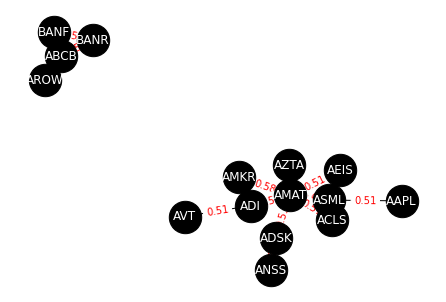

In [23]:
link_threshold = 0.6
frequency_threshold = 0.5
draw = True
separate_groups  = find_correlation_groups(time_window_splits,price_df_train,link_threshold,frequency_threshold ,draw)
print('Each link has a correlation threshold','link_threshold=',link_threshold,', meaning that it needs to have at least this much of correlation to be considered at all.')
print('Each link has to appear in at least ','frequency_threshold',frequency_threshold,' of all time windows.')
print("This gives us robust groups, as it is shown in the drawing below:")

# 2.3 Validation

In [24]:
step = 0.1
draw = False
link_frequency_dictionary = {'frequency_threshold':[],'link_threshold':[],'number_of_groups':[],'mean_group_size':[],'std_group_size':[]}
for link_threshold in np.arange(0,1 + step,step):
    for frequency_threshold in np.arange(0,1 + step,step):
        print(np.round(link_threshold,2),np.round(frequency_threshold,2))
        separate_groups  = find_correlation_groups(time_window_splits,price_df_train,link_threshold,frequency_threshold ,draw)
        nr_groups = len(separate_groups)
        group_sizes = [len(group)/len(tickers) for group in separate_groups]
        if len(group_sizes)>0:
            mean_group_size = np.mean(group_sizes)
            std_group_size = np.std(group_sizes)
        else:
            mean_group_size = 0
            std_group_size = 0
        link_frequency_dictionary['frequency_threshold'].append(np.round(frequency_threshold,1))
        link_frequency_dictionary['link_threshold'].append(np.round(link_threshold,1))
        link_frequency_dictionary['mean_group_size'].append(np.round(mean_group_size,3))
        link_frequency_dictionary['std_group_size'].append(np.round(std_group_size,3))
        link_frequency_dictionary['number_of_groups'].append(nr_groups)

0.0 0.0
0.0 0.1
0.0 0.2
0.0 0.3
0.0 0.4
0.0 0.5
0.0 0.6
0.0 0.7
0.0 0.8
0.0 0.9
0.0 1.0
0.1 0.0
0.1 0.1
0.1 0.2
0.1 0.3
0.1 0.4
0.1 0.5
0.1 0.6
0.1 0.7
0.1 0.8
0.1 0.9
0.1 1.0
0.2 0.0
0.2 0.1
0.2 0.2
0.2 0.3
0.2 0.4
0.2 0.5
0.2 0.6
0.2 0.7
0.2 0.8
0.2 0.9
0.2 1.0
0.3 0.0
0.3 0.1
0.3 0.2
0.3 0.3
0.3 0.4
0.3 0.5
0.3 0.6
0.3 0.7
0.3 0.8
0.3 0.9
0.3 1.0
0.4 0.0
0.4 0.1
0.4 0.2
0.4 0.3
0.4 0.4
0.4 0.5
0.4 0.6
0.4 0.7
0.4 0.8
0.4 0.9
0.4 1.0
0.5 0.0
0.5 0.1
0.5 0.2
0.5 0.3
0.5 0.4
0.5 0.5
0.5 0.6
0.5 0.7
0.5 0.8
0.5 0.9
0.5 1.0
0.6 0.0
0.6 0.1
0.6 0.2
0.6 0.3
0.6 0.4
0.6 0.5
0.6 0.6
0.6 0.7
0.6 0.8
0.6 0.9
0.6 1.0
0.7 0.0
0.7 0.1
0.7 0.2
0.7 0.3
0.7 0.4
0.7 0.5
0.7 0.6
0.7 0.7
0.7 0.8
0.7 0.9
0.7 1.0
0.8 0.0
0.8 0.1
0.8 0.2
0.8 0.3
0.8 0.4
0.8 0.5
0.8 0.6
0.8 0.7
0.8 0.8
0.8 0.9
0.8 1.0
0.9 0.0
0.9 0.1
0.9 0.2
0.9 0.3
0.9 0.4
0.9 0.5
0.9 0.6
0.9 0.7
0.9 0.8
0.9 0.9
0.9 1.0
1.0 0.0
1.0 0.1
1.0 0.2
1.0 0.3
1.0 0.4
1.0 0.5
1.0 0.6
1.0 0.7
1.0 0.8
1.0 0.9
1.0 1.0


In [25]:
link_frequency_df = pd.DataFrame(link_frequency_dictionary)
result_1 = link_frequency_df.pivot(index='frequency_threshold', columns='link_threshold', values='number_of_groups')
result_2 = link_frequency_df.pivot(index='frequency_threshold', columns='link_threshold', values='mean_group_size')
result_3 = link_frequency_df.pivot(index='frequency_threshold', columns='link_threshold', values='std_group_size')

Text(0.5, 1.0, 'Number of groups')

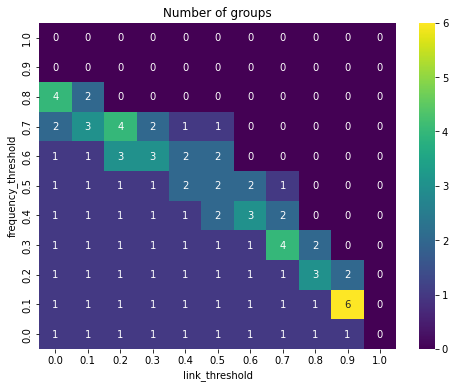

In [26]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(result_1, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Number of groups')

Text(0.5, 1.0, 'Mean group size')

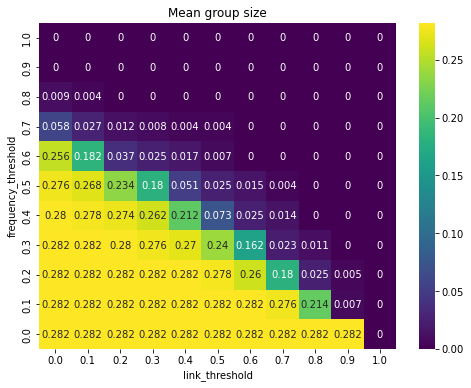

In [27]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(result_2, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Mean group size')

Text(0.5, 1.0, 'Std group size')

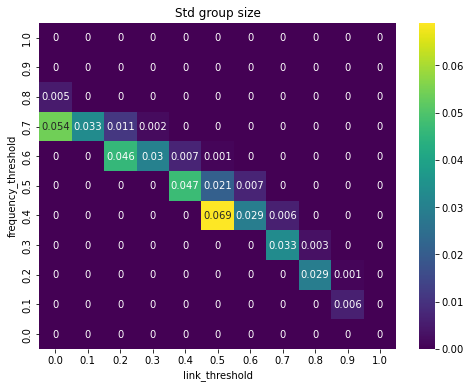

In [28]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(result_3, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Std group size')

# 3 Network analysis & Strategy

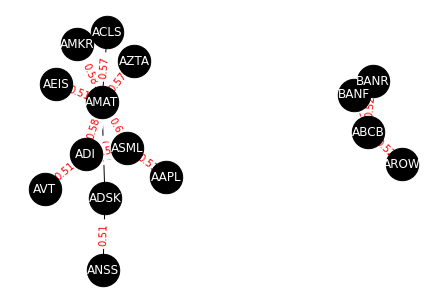

In [29]:
# These are determined, highly correlated groups
link_threshold = 0.6
frequency_threshold = 0.5
draw = True
separate_groups  = find_correlation_groups(time_window_splits,price_df_train,link_threshold,frequency_threshold ,draw)

In [30]:
price_df_test,daily_returns_df_test = get_data(tickers,testing_start_date,testing_end_date )
tot_days_test = len(price_df_test)
print('Total number of testing days is', tot_days_test)

0 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
1 500
[*********************100%***********************]  1 of 1 completed
2021-11-10 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
2 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACIW: Period 'max' is invalid, must be one of ['1d', '5d']
3 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
4 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
5 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
6 500
[*********************100%***********************]  1 of 1 com

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
54 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
55 500
[*********************100%***********************]  1 of 1 completed
2022-11-15 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
56 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
57 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
58 500
[*********************100%***********************]  1 of 1 completed
2021-09-16 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
59 500
[*********************100%***********************]  1 of 1 compl

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
106 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
107 500
[*********************100%***********************]  1 of 1 completed
2022-04-13 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
108 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AFARW: Period 'max' is invalid, must be one of ['1d', '5d']
109 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
110 500
[*********************100%***********************]  1 of 1 completed
2021-03-19 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
111 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2022-03-15 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
158 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
159 500
[*********************100%***********************]  1 of 1 completed
2021-06-30 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
160 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
161 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
162 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
163 500
[*********************100%***********************]  1 of 1

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALVOW: Period 'max' is invalid, must be one of ['1d', '5d']
210 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
211 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
212 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
213 500
[*********************100%***********************]  1 of 1 completed
2021-06-15 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
214 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
215 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2021-04-29 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
262 500
[*********************100%***********************]  1 of 1 completed
2021-03-02 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
263 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ANZUW: Period 'max' is invalid, must be one of ['1d', '5d']
264 500
[*********************100%***********************]  1 of 1 completed
2022-02-11 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
265 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AOGOW: Period 'max' is invalid, must be one of ['1d', '5d']
266 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
267 500
[*********************100%***********************]  1 

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
314 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ARBEW: Period 'max' is invalid, must be one of ['1d', '5d']
315 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ARBGW: Period 'max' is invalid, must be one of ['1d', '5d']
316 500
[*********************100%***********************]  1 of 1 completed
2021-09-23 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
317 500
[*********************100%***********************]  1 of 1 completed
2021-11-18 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
318 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
319 500
[*********************100%***********************]  1 

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
366 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASPAW: Period 'max' is invalid, must be one of ['1d', '5d']
367 500
[*********************100%***********************]  1 of 1 completed
2022-11-10 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
368 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
369 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
370 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
371 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
418 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
419 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
420 500
[*********************100%***********************]  1 of 1 completed
2021-03-31 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
421 500
[*********************100%***********************]  1 of 1 completed
2021-06-14 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
422 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
423 500
[*********************100%***********************]  1 of 1

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
470 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
471 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
472 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
473 500
[*********************100%***********************]  1 of 1 completed
2021-03-17 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
474 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BAERW: Period 'max' is invalid, must be one of ['1d', '5d']
475 500
[*********************100%***********************]  1 of

In [31]:
#We are using the same window size as before
n_time_windows_test = 100
size_boolean = True
chosen_time_window_size = 30
tot_days_test = len(price_df_test)      
time_window_splits_test, time_window_size = split_time_windows(tot_days_test,n_time_windows_test,chosen_time_window_size,size_boolean)

In [263]:
#Maybe test different correlation
def find_dropout_candidates(price_df,time_window_splits_test,drop_out_threshold):
    corr_test_df_dict = {}
    for i in range(1,len(time_window_splits_test)):
        corr_test_df_dict[i] = price_df.iloc[time_window_splits_test[i-1]:time_window_splits_test[i],:].corr()
    corr_test_df_dict

    asset_ticker_list = list(corr_test_df_dict[1].columns)
    correlation_pairs_test_dict = {}
    for time_window_index  in corr_test_df_dict.keys():
        correlation_pairs_test_dict[time_window_index] = {}
        for ticker_1 in asset_ticker_list:
            for ticker_2 in asset_ticker_list:
                if ticker_1 != ticker_2:
                    correlation_pairs_test_dict[time_window_index][(ticker_1,ticker_2)] = corr_test_df_dict[time_window_index].loc[ticker_1,ticker_2]

    pairs_to_check = {}
    for group in separate_groups:
        pairs_to_check[tuple(group)] = []
        for i in group:
            for j in group:
                if j != i:
                    pairs_to_check[tuple(group)].append((i,j))



    drop_out_candidates_dict = {}
    drop_out_chosen_dict = {}
    position_count= 0
    for time_window_index in list(correlation_pairs_test_dict.keys())[:-1]:
        position_list = []
        dropout_not_found = False
        drop_out_candidates_dict[time_window_index] = {}
        for group in separate_groups:
            N = len(group)
            N_full_graph = N*(N-1)/2
            drop_out_candidates_dict[time_window_index] [tuple(group)] = {}
            for pair in pairs_to_check[tuple(group)]:
                corr = correlation_pairs_test_dict[time_window_index][pair]
                if corr <= drop_out_threshold:
                    # We add 1/2 because of the double count, will be fixed later
                    if pair[0] in drop_out_candidates_dict[time_window_index][tuple(group)].keys():
                        drop_out_candidates_dict[time_window_index][tuple(group)][pair[0]] += (1/2)
                    else:
                        drop_out_candidates_dict[time_window_index][tuple(group)][pair[0]] = (1/2)
                    if pair[1] in drop_out_candidates_dict[time_window_index][tuple(group)].keys():
                        drop_out_candidates_dict[time_window_index][tuple(group)][pair[1]] +=(1/2)
                    else:
                        drop_out_candidates_dict[time_window_index][tuple(group)][pair[1]] = (1/2)
                #Check for the case if there's no dropout
            #print(drop_out_candidates_dict[time_window_index][tuple(group)])
            if len(drop_out_candidates_dict[time_window_index][tuple(group)]) != 0:
                worst_dropout =  sorted(drop_out_candidates_dict[time_window_index] [tuple(group)].items(),key = lambda x:x[1])[-1][0]
                #print(sorted(drop_out_candidates_dict[time_window_index] [tuple(group)].items(),key = lambda x:x[1]))
                if  drop_out_candidates_dict[time_window_index] [tuple(group)][worst_dropout] >= 0 :
                    drop_out_chosen_dict[ position_count ] = {'asset':worst_dropout,'group':group,'time_window_index':time_window_index}
                    position_list.append(position_count)
                    position_count +=1
                else:
                    #    #Drop out candiate not found
                    dropout_not_found = True
                #elif :
                     #Drop out candiate not found
                    #dropout_not_found = True
        for position_count in position_list:
            non_empty_counter = 0
            for group in separate_groups:
                if len(drop_out_candidates_dict[time_window_index] [tuple(group)]) > 0:
                    non_empty_counter += 1
            #print(non_empty_counter)
            if  non_empty_counter ==0:
                if position_count in drop_out_chosen_dict.keys():
                    del drop_out_chosen_dict[position_count]
                continue
            if dropout_not_found:
                if position_count in drop_out_chosen_dict.keys():
                    del drop_out_chosen_dict[position_count]
                continue
            start_day = time_window_splits_test[time_window_index-1]-1
            end_day = time_window_splits_test[time_window_index]-1
            start_day_next =  time_window_splits_test[time_window_index]
            end_day_next =  time_window_splits_test[time_window_index+1]
            drop_out_asset = drop_out_chosen_dict[position_count]['asset']
            group = drop_out_chosen_dict[position_count]['group']
            price_time_window = price_df.iloc[start_day:end_day,:].copy()
            price_time_window_next = price_df.iloc[start_day_next:end_day_next,:].copy()

            drop_out_chosen_dict[position_count]['trend_change_asset'] = (price_time_window[drop_out_asset].values[-1] - price_time_window[drop_out_asset].values[0])/price_time_window[drop_out_asset].values[0]
            drop_out_chosen_dict[position_count]['trend_change_asset_next'] =  (price_time_window_next[drop_out_asset].values[-1] - price_time_window_next[drop_out_asset].values[0])/price_time_window_next[drop_out_asset].values[0]
            drop_out_chosen_dict[position_count]['starting_price_asset'] = price_time_window[drop_out_asset].values[0]
            drop_out_chosen_dict[position_count]['ending_price_asset'] = price_time_window[drop_out_asset].values[-1]
            drop_out_chosen_dict[position_count]['ending_date_asset'] = price_time_window.index[-1]
            drop_out_chosen_dict[position_count]['opening_price_asset'] = price_df.iloc[start_day,:][drop_out_asset].copy()
            drop_out_chosen_dict[position_count]['opening_date_asset'] = price_time_window.index[-1] +  datetime.timedelta(days = 1)
            group_change_list = []
            group_change_next_list = []
            for asset in group: 
                if asset != drop_out_asset:
                    prct_change = (price_time_window[asset].values[-1] - price_time_window[asset].values[0])/price_time_window[asset].values[0]
                    prct_change_next = (price_time_window_next[asset].values[-1] - price_time_window_next[asset].values[0])/price_time_window_next[asset].values[0]
                    group_change_list.append(prct_change)
                    group_change_next_list.append(prct_change_next)
            drop_out_chosen_dict[position_count]['trend_change_group'] = np.mean(group_change_list)
            drop_out_chosen_dict[position_count]['trend_change_group_next'] = np.mean(group_change_next_list)

    return drop_out_chosen_dict,correlation_pairs_test_dict

In [33]:
# This should be an optimized correlation threshold
drop_out_threshold = 0.4
#this should be optimized, currently half of the group
#int(len(group)/2)
link_loss_threshold = 0
drop_out_chosen_dict,correlation_pairs_test_dict = find_dropout_candidates(price_df_test,time_window_splits_test,drop_out_threshold,link_loss_threshold)

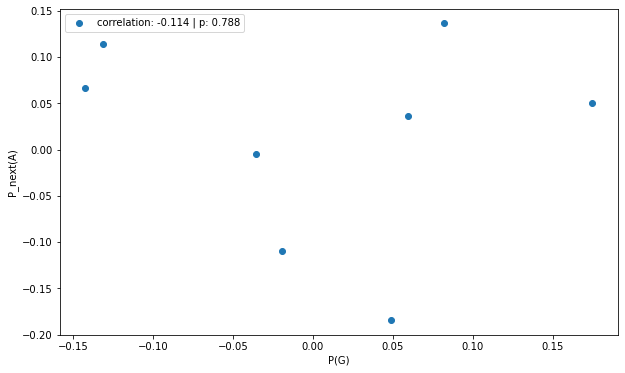

In [34]:
trend_dictionary = {}
trend_group_dict = {}
trend_strings = ['trend_change_asset', 'trend_change_asset_next', 'trend_change_group']
x  = []
y = []
plt.figure(figsize=(10,6))
for index in drop_out_chosen_dict.keys():
    y.append(drop_out_chosen_dict[index]['trend_change_asset_next'])
    x.append(drop_out_chosen_dict[index]['trend_change_group'])
rho, p = np.round(pearsonr(x,y),3)
plt.scatter(x,y,label='correlation: ' + str(rho) +' | p: ' + str(p))
plt.ylabel('P_next(A)')
plt.xlabel("P(G)")
plt.legend()




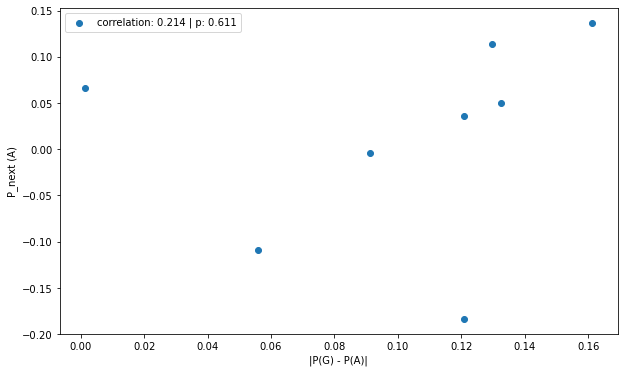

In [35]:
trend_dictionary = {}
trend_group_dict = {}
trend_strings = ['trend_change_asset', 'trend_change_asset_next', 'trend_change_group']
x  = []
y = []
plt.figure(figsize=(10,6))
for index in drop_out_chosen_dict.keys():
    y.append(drop_out_chosen_dict[index]['trend_change_asset_next'])
    x.append(abs(drop_out_chosen_dict[index]['trend_change_group'] - drop_out_chosen_dict[index]['trend_change_asset']))
rho, p = np.round(pearsonr(x,y),3)
plt.scatter(x,y,label='correlation: ' + str(rho) +' | p: ' + str(p))
plt.ylabel('P_next (A)')
plt.xlabel("|P(G) - P(A)|")
plt.legend()




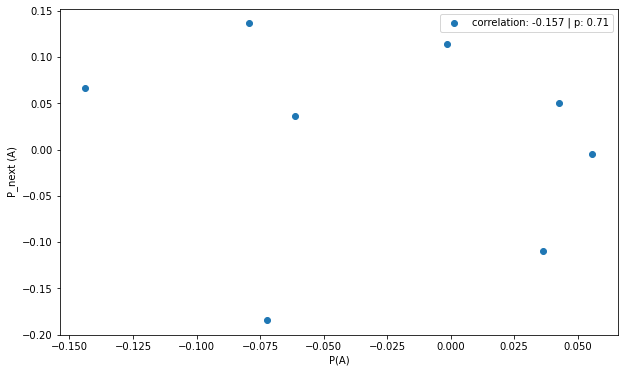

In [36]:
trend_dictionary = {}
trend_group_dict = {}
trend_strings = ['trend_change_asset', 'trend_change_asset_next', 'trend_change_group']
x  = []
y = []
plt.figure(figsize=(10,6))
for index in drop_out_chosen_dict.keys():
    y.append(drop_out_chosen_dict[index]['trend_change_asset_next'])
    x.append(drop_out_chosen_dict[index]['trend_change_asset'])
rho, p = np.round(pearsonr(x,y),3)
plt.scatter(x,y,label='correlation: ' + str(rho) +' | p: ' + str(p))
plt.ylabel('P_next (A)')
plt.xlabel("P(A)")
plt.legend()




In [37]:
step = 0.1
draw = False
step = 0.1
step_link_loss = 1
# Link_loss_list depends on the rough proportion
link_loss_list = [0]#
dropout_linkloss_dictionary = {'drop_out_threshold':[],'link_loss_threshold':[],'correlation_g_na':[],'p_value_g_na':[] ,'correlation_dga_na':[],'p_value_dga_na':[],'number_of_dropouts':[],'correlation_a_na':[],'p_value_a_na':[]}
for drop_out_threshold in np.arange(0,1 + step,step):
    for link_loss_threshold in link_loss_list:
        print(np.round(drop_out_threshold,2),link_loss_threshold)
        drop_out_chosen_dict,correlation_pairs_test_dict  = find_dropout_candidates(price_df_test,time_window_splits_test,drop_out_threshold,link_loss_threshold)
        x = []
        y = []
        z = []
        k = []
        if len(drop_out_chosen_dict)>1:
            for index in drop_out_chosen_dict.keys():
                y.append(drop_out_chosen_dict[index]['trend_change_asset_next'])
                x.append(drop_out_chosen_dict[index]['trend_change_group'])
                z.append(abs(drop_out_chosen_dict[index]['trend_change_group']- drop_out_chosen_dict[index]['trend_change_asset']))
                k.append(drop_out_chosen_dict[index]['trend_change_asset'])
            rho, p = pearsonr(x,y)
            rho = np.round(rho,3)
            p = np.round(p,3)
            rho_diff_dga_na,p_diff_dga_na = pearsonr(x,z)
            rho_diff_dga_na= np.round(rho_diff_dga_na,3)
            p_diff_dga_na = np.round(p_diff_dga_na,3)
            
            rho_diff_a_na,p_diff_a_na = pearsonr(k,y)
            rho_diff_a_na = np.round(rho_diff_a_na,3)
            p_diff_a_na = np.round(p_diff_a_na,3)
            
            dropout_linkloss_dictionary['number_of_dropouts'].append(len(x))
            dropout_linkloss_dictionary['drop_out_threshold'].append(np.round(drop_out_threshold,2))
            dropout_linkloss_dictionary['link_loss_threshold'].append(link_loss_threshold)
            dropout_linkloss_dictionary['correlation_g_na'].append(np.round(rho,2))
            dropout_linkloss_dictionary['p_value_g_na'].append(np.round( p,3))
            dropout_linkloss_dictionary['correlation_dga_na'].append(np.round(rho_diff_dga_na,2))
            dropout_linkloss_dictionary['p_value_dga_na'].append(np.round( p_diff_dga_na,3))
            dropout_linkloss_dictionary['correlation_a_na'].append(np.round(rho_diff_a_na,2))
            dropout_linkloss_dictionary['p_value_a_na'].append(np.round( p_diff_a_na,3))

0.0 0
0.1 0
0.2 0
0.3 0
0.4 0
0.5 0
0.6 0
0.7 0
0.8 0
0.9 0
1.0 0


In [38]:
dropout_linkloss_df = pd.DataFrame(dropout_linkloss_dictionary)
result_1 = dropout_linkloss_df .pivot(index='drop_out_threshold', columns='link_loss_threshold', values='number_of_dropouts')
result_2 = dropout_linkloss_df .pivot(index='drop_out_threshold', columns='link_loss_threshold', values='correlation_g_na')
result_3 = dropout_linkloss_df .pivot(index='drop_out_threshold', columns='link_loss_threshold', values='p_value_g_na')
result_4 = dropout_linkloss_df .pivot(index='drop_out_threshold', columns='link_loss_threshold', values='correlation_dga_na')
result_5 = dropout_linkloss_df .pivot(index='drop_out_threshold', columns='link_loss_threshold', values='p_value_dga_na')
result_6 = dropout_linkloss_df .pivot(index='drop_out_threshold', columns='link_loss_threshold', values='correlation_a_na')
result_7 = dropout_linkloss_df .pivot(index='drop_out_threshold', columns='link_loss_threshold', values='p_value_a_na')

Text(0.5, 1.0, 'Number of opened positions')

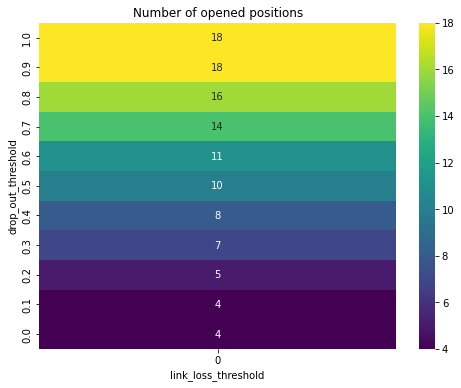

In [39]:
plt.figure(figsize = (8,6))
ax = sns.heatmap(result_1, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Number of opened positions')

Text(0.5, 1.0, 'p value')

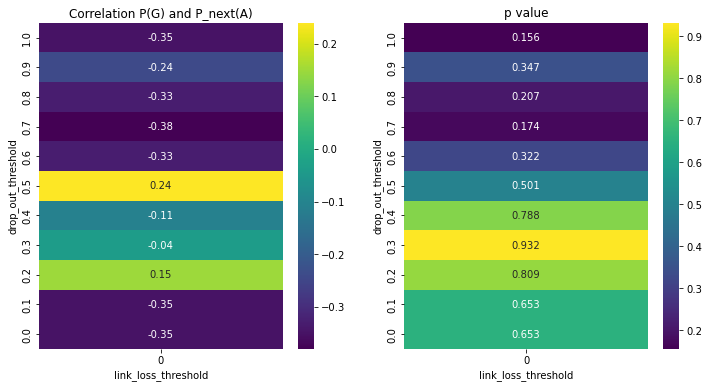

In [40]:
plt.figure(figsize = (12,6))
plt.subplot(121)
ax = sns.heatmap(result_2, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Correlation P(G) and P_next(A)')
plt.subplot(122)
ax = sns.heatmap(result_3, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('p value')

Text(0.5, 1.0, 'p value')

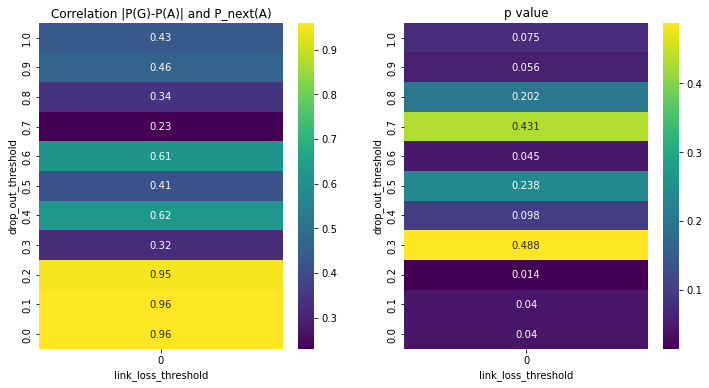

In [41]:
plt.figure(figsize = (12,6))
plt.subplot(121)
ax = sns.heatmap(result_4, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Correlation |P(G)-P(A)| and P_next(A)')
plt.subplot(122)
ax = sns.heatmap(result_5, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('p value')

Text(0.5, 1.0, 'p value')

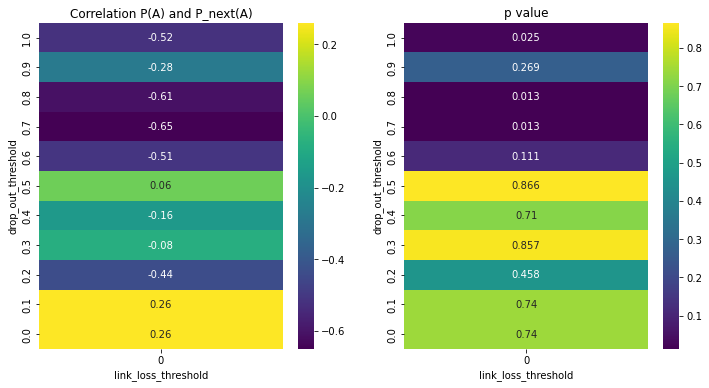

In [42]:
plt.figure(figsize = (12,6))
plt.subplot(121)
ax = sns.heatmap(result_6, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('Correlation P(A) and P_next(A)')
plt.subplot(122)
ax = sns.heatmap(result_7, annot=True, fmt="g", cmap='viridis')
ax.invert_yaxis()
plt.title('p value')

In [43]:
# Determine compared to the group, is the stock under or overperforming
# Short the overperforming (it will go back down)
# Long the underperforming (it will go back up)

# Both need to be bought at the same time to compensate for the trend

# How do we approach the  group? DO we buy equal amounts?
# Focus on the biggest dropout, so we focus on one and wait until the trend goes back.
# How much money should spent on the group and on the individual dropout
# When do you open and close the position, because at the intersection points, your profit is zero, minus the comission fees
# Start following the spread once the correlation brakes off

In [268]:

def create_signals(price_df,time_window_splits_test,drop_out_threshold,link_loss_threshold,initial_capital,investment_parameter):
    # Gathering more information for each drop out
    # Opening the positions
    drop_out_chosen_dict,correlation_pairs_test_dict = find_dropout_candidates(price_df,time_window_splits_test,drop_out_threshold)
    signals_dictionary = {}
    current_capital = initial_capital
    for position_index in list(drop_out_chosen_dict.keys()):
        #print(position_index)
        time_window_index = drop_out_chosen_dict[position_index]['time_window_index']
        asset = drop_out_chosen_dict[position_index]['asset']
        group = drop_out_chosen_dict[position_index]['group']
        #risky strategy - just look at the group
        #less risky - look at both the group and the asset
        date = drop_out_chosen_dict[position_index]['opening_date_asset'] 
        if date < price_df.index[-1]:
            asset = drop_out_chosen_dict[position_index]['asset']
            #Money spent can be changed based on the degree of confidence, group asset change
            group_asset_change = drop_out_chosen_dict[position_index]['trend_change_group']- drop_out_chosen_dict[position_index]['trend_change_asset']
            group_asset_change_abs = abs(group_asset_change)
            group_asset_change_sign = int(np.sign(group_asset_change_abs))
            money_to_spend = investment_parameter * current_capital * group_asset_change_abs 
            current_capital -= money_to_spend
            price = drop_out_chosen_dict[position_index]['opening_price_asset']
            volume = int(np.floor(money_to_spend/price))
            #Short or long is decided by the group sign
            if group_asset_change_sign == 1:
                # long
                position = 'long'
            else:
                #short
                position = 'short'

            signals_dictionary[position_index] = {'asset':asset,'group':group,'open_volume':volume,'open_price':price,'open_date':date,'position':'long'}

    closing_time_delta = 30
    last_day =  price_df.index[-1]
    for position_index in list(signals_dictionary.keys()):
        asset = signals_dictionary[position_index]['asset']
        closing_date = signals_dictionary[position_index]['open_date'] +  datetime.timedelta(days = closing_time_delta)
        if  closing_date > price_df.index[-1]:
            closing_date = price_df.index[-1]
        signals_dictionary[position_index]['close_date'] = closing_date
        closing_date_exists = False 
        closing_date_row = price_df[price_df.index == closing_date]
        if len(closing_date_row) > 0:
            closing_price = price_df[price_df.index == closing_date][asset].values[0]
            signals_dictionary[position_index]['close_price'] = closing_price 
        else:
            closing_price = price_df[price_df.index == last_day][asset].values[0]
            signals_dictionary[position_index]['close_price'] = closing_price 
        signals_dictionary[position_index]['close_volume'] = signals_dictionary[position_index]['open_volume']
        current_capital += closing_price * signals_dictionary[position_index]['close_volume'] 
    return signals_dictionary,current_capital

In [230]:
initial_capital = 1000000
investment_parameter = 0.2
link_loss_threshold = 0
drop_out_threshold = 0.8
long_short_parameter = 0
signals_dictionary,current_capital=  create_signals(price_df_test,time_window_splits_test,drop_out_threshold,link_loss_threshold,initial_capital,investment_parameter,long_short_parameter)

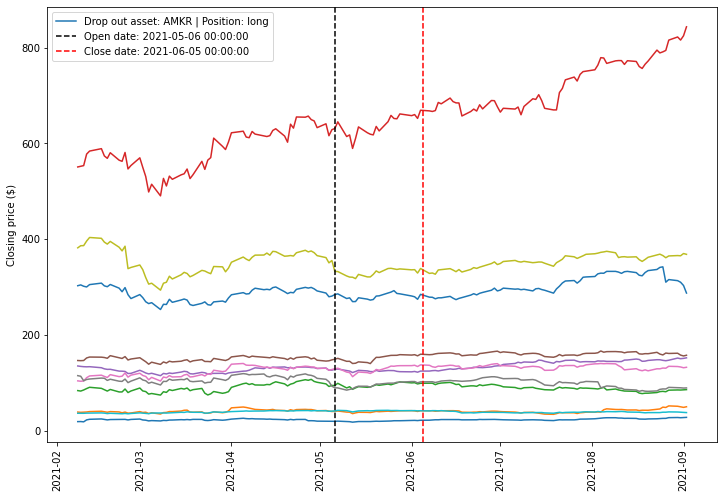

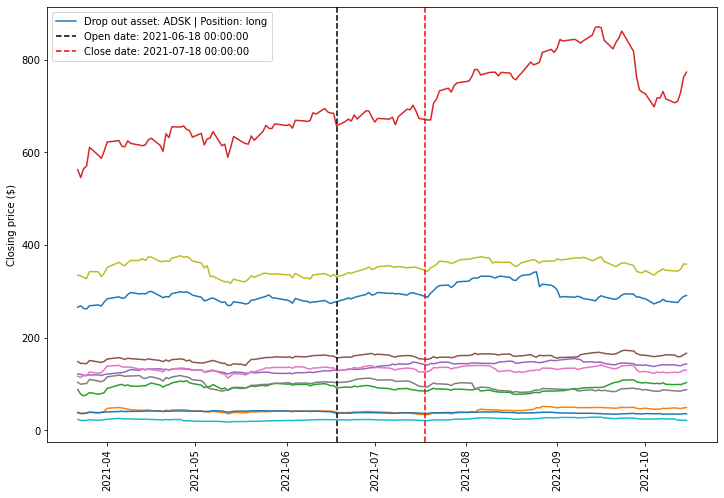

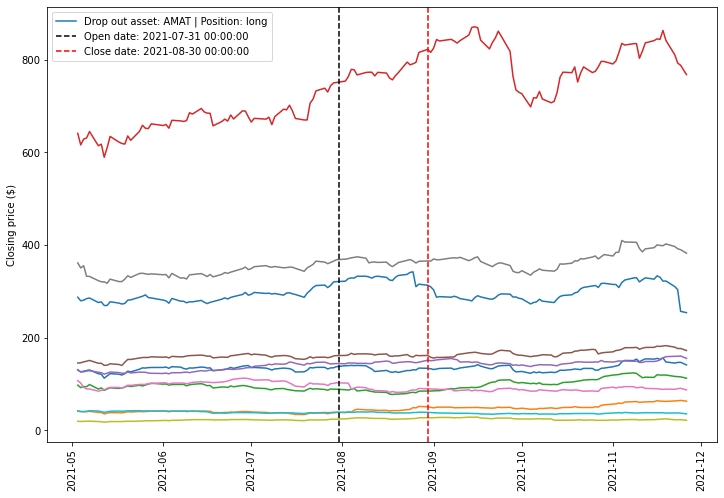

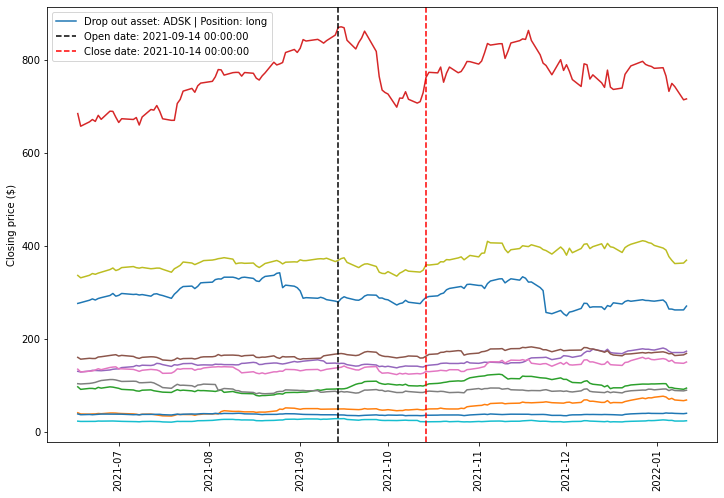

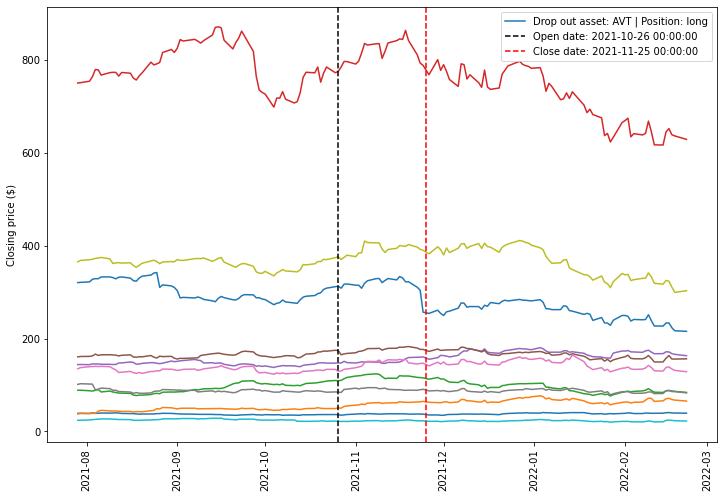

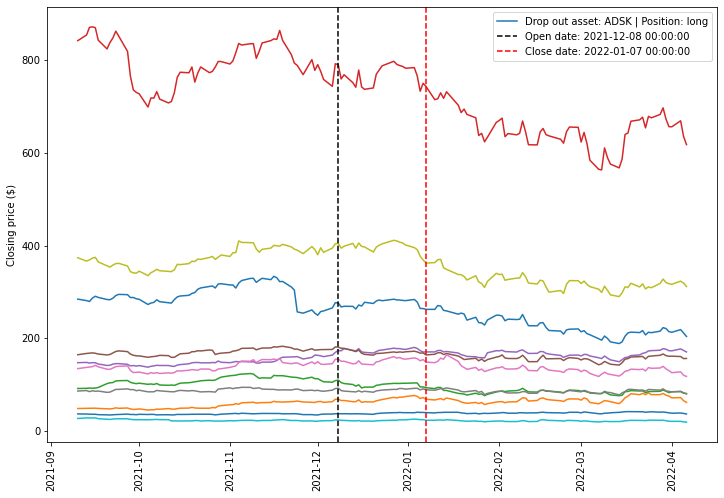

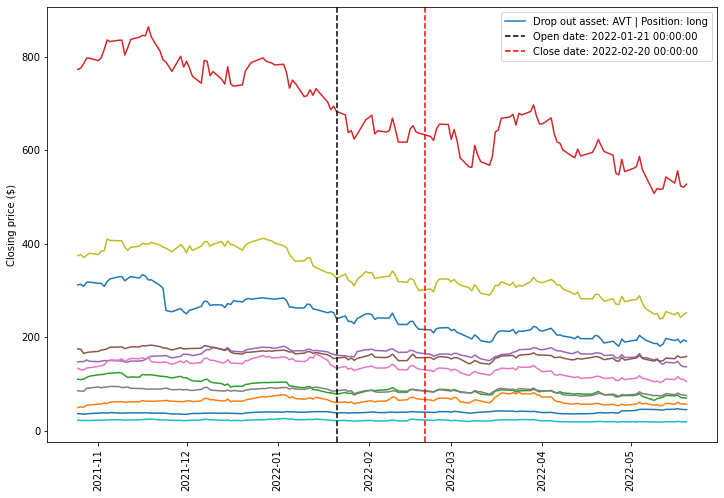

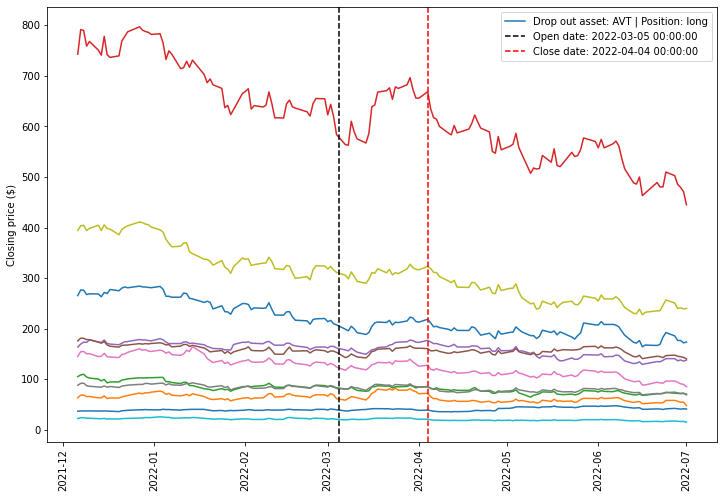

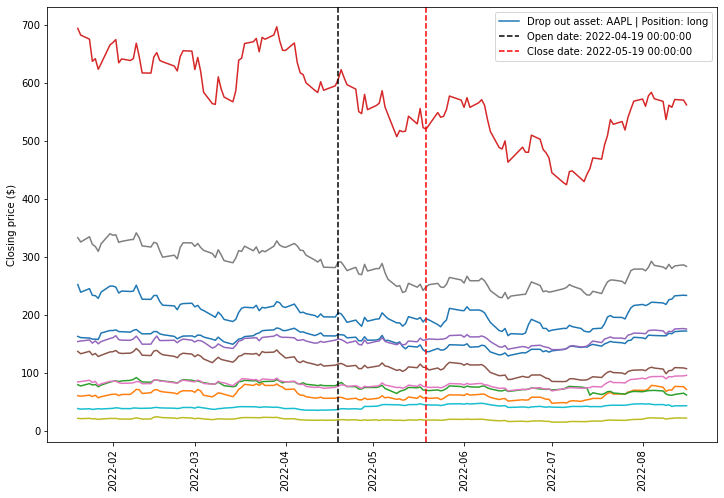

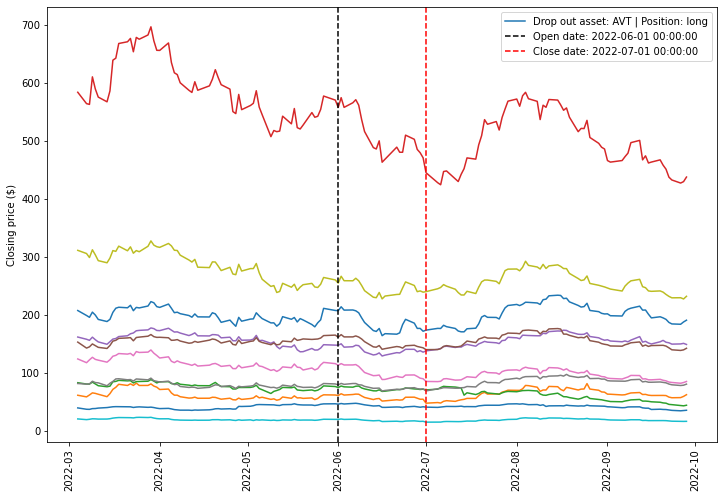

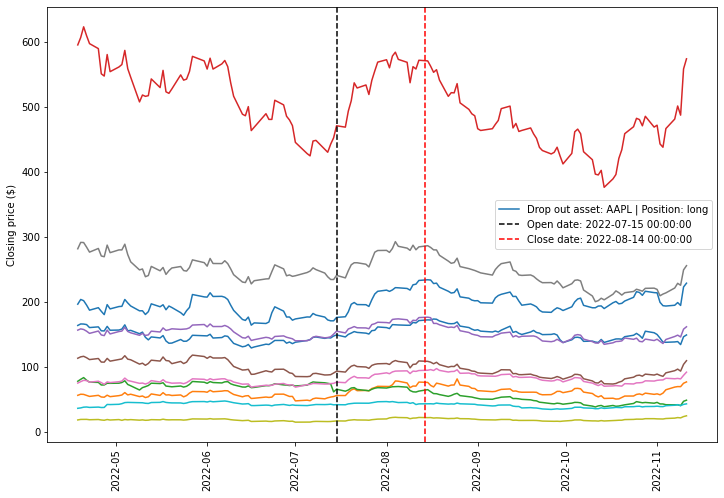

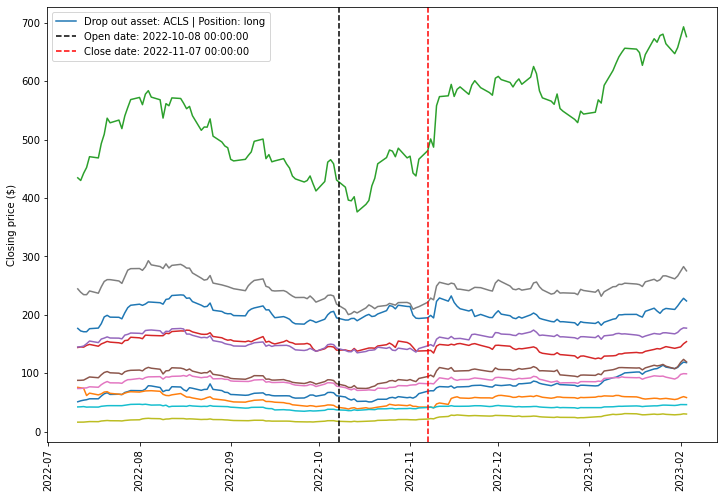

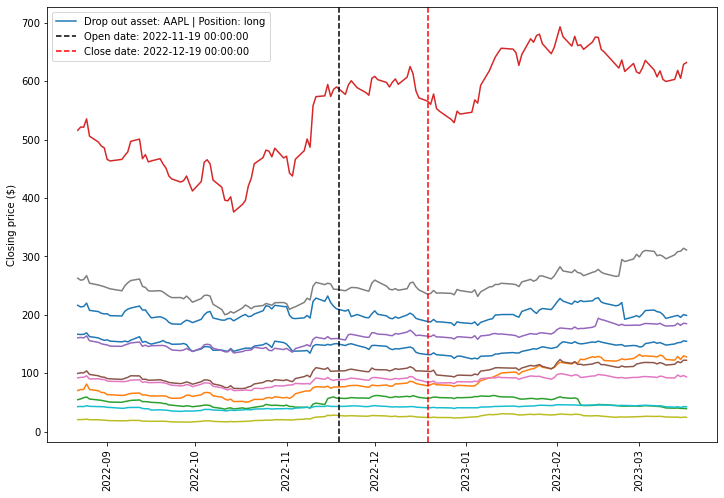

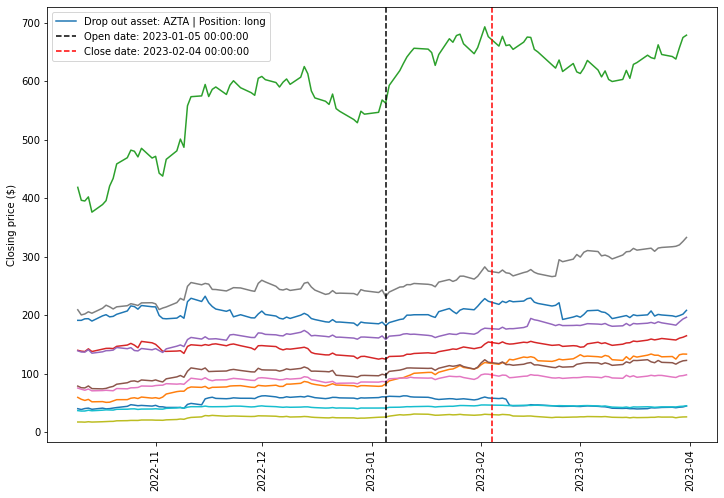

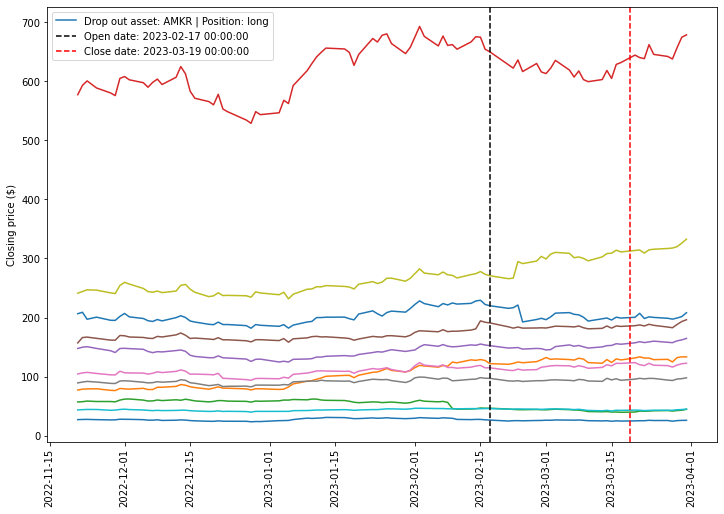

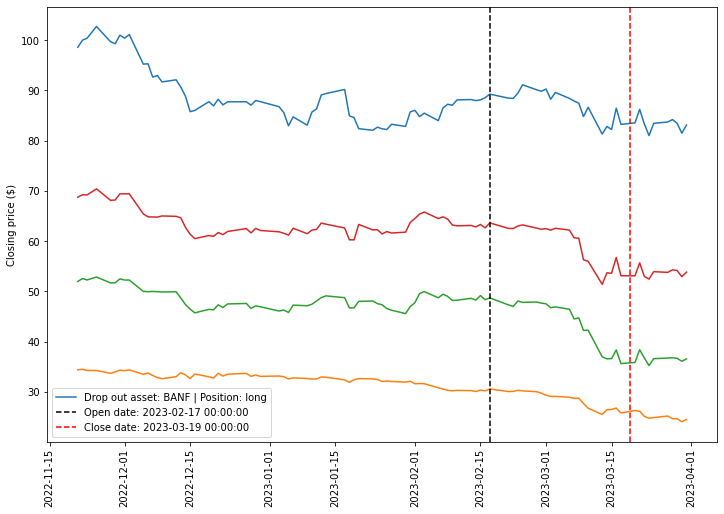

In [231]:
for i in signals_dictionary.keys():
    asset = signals_dictionary[i]['asset']
    group = signals_dictionary[i]['group']
    position = signals_dictionary[i]['position']
    group = [x for x in group if x != asset]
    open_date = signals_dictionary[i]['open_date']
    close_date = signals_dictionary[i]['close_date']
    asset_df = price_df_test[signals_dictionary[i]['asset']].copy()
    asset_df = asset_df[(asset_df.index > open_date -  datetime.timedelta(90)) & (asset_df.index <close_date +  datetime.timedelta(90))]
    group_df = price_df_test[group].copy()
    group_df = group_df[(group_df.index > open_date -  datetime.timedelta(90)) & (group_df.index <close_date +  datetime.timedelta(90))]
    plt.figure(figsize=(12,8))
    plt.plot(asset_df.index,asset_df,label='Drop out asset: ' + asset + ' | Position: ' + position)
    plt.plot(group_df.index,group_df)
    plt.xticks(rotation=90)
    plt.axvline(open_date,color='black',linestyle='--',label='Open date: ' + str(open_date))
    plt.axvline(close_date,color='red',linestyle='--',label='Close date: ' + str(close_date))
    plt.ylabel('Closing price ($)')
    plt.legend()

# 4 Strategy analysis


In [232]:
def price_difference_analysis(signals_dictionary,parameters_dictionary,plot):
    
    price_difference_cumul_dict = {}
    cumulative_price_diff = 0
    for position_index in list(signals_dictionary.keys()):
        position = signals_dictionary[position_index]['position']
        close_date = signals_dictionary[position_index]['close_date']
        volume =  signals_dictionary[position_index]['open_volume']
        if position =='long':
            open_price = signals_dictionary[position_index]['open_price']
            close_price = signals_dictionary[position_index]['close_price']
            cumulative_price_diff += close_price - open_price
            price_difference_cumul_dict[close_date ] = cumulative_price_diff *volume
        elif position =='short':
            open_price = signals_dictionary[position_index]['open_price']
            close_price = signals_dictionary[position_index]['close_price']
            cumulative_price_dif += - (close_price - open_price)
            price_difference_cumul_dict[close_date ] = cumulative_price_diff *volume
            
    if plot == True:
        plt.scatter(price_difference_cumul_dict.keys(),price_difference_cumul_dict.values())
        plt.xlabel('Close date')
        plt.ylabel('Profit ($)')
        plt.xticks(rotation=45)
    return cumulative_price_diff 

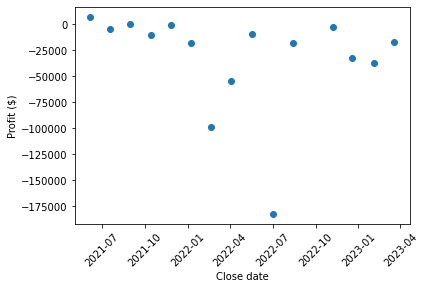

In [233]:
parameters_dictionary = {'a':1}
plot = True
cumul_price_diff = price_difference_analysis(signals_dictionary,parameters_dictionary,plot)

In [241]:
def timeseries(signals_dictionary,start_date,end_date):
    ticks=[]
    for i in list(signals_dictionary.keys()):
        ticks.append(signals_dictionary[i]['asset'])
    ticks = list(set(ticks))
    price_data,change_data=get_data(ticks,start_date,end_date)
    date_range = pd.date_range(start_date,end_date)
    print(price_data.columns)
    portfolio = pd.DataFrame(index=date_range)
    portfolio['balance']=0
    portfolio['long value']=0
    portfolio['short value']=0
    cash=initial_capital
    open_positions=[]
    last_price=0
    for t in date_range:

        buy=[]
        sell=[]

        for position_index in list(signals_dictionary.keys()):
            open_timestamp = signals_dictionary[position_index]['open_date']

            close_timestamp = signals_dictionary[position_index]['close_date']

            if close_timestamp==t:
                sell.append(position_index)
            if open_timestamp==t:
                buy.append(position_index)


        if len(buy)==0 and len(sell)==0:
            portfolio.loc[t,'balance']=cash

        if len(buy)!=0 or len(sell)!=0:
            if len(buy)!=0:
                for b in buy:
                    position = signals_dictionary[b]['position']
                    if position =='long':
                        open_positions.append(b)
                        cash=cash-signals_dictionary[b]['open_price']*signals_dictionary[b]['open_volume']
                        portfolio.loc[t,'balance']=cash
                    if position =='short':
                        open_positions.append(b)
                        cash=cash+signals_dictionary[b]['open_price']*signals_dictionary[b]['open_volume']
                        portfolio.loc[t,'balance']=cash
            if len(sell)!=0:
                for s in sell:
                    position = signals_dictionary[s]['position']
                    if position =='long':
                        open_positions.remove(s)
                        cash=cash+signals_dictionary[s]['close_price']*signals_dictionary[s]['open_volume']
                        portfolio.loc[t,'balance']=cash
                    if position =='short':
                        open_positions.remove(s)
                        cash=cash-signals_dictionary[s]['close_price']*signals_dictionary[s]['open_volume']
                        portfolio.loc[t,'balance']=cash
                        
        if len(open_positions)!=0:
            long_value=0
            short_value=0
            for l in open_positions:
                if signals_dictionary[l]['position']=='long':
                    if t in price_data.index:
                        last_price_long = price_data[price_data.index ==t][signals_dictionary[l]['asset']].values[0]
                        long_value=long_value+last_price_long *signals_dictionary[l]['open_volume']
                        #print(long_value)
                        portfolio.loc[t,'long value']=long_value
                    else:
                        #print('problem',lastprice_long)
                        long_value=long_value+last_price_long*signals_dictionary[l]['open_volume']
                        portfolio.loc[t,'long value']=long_value
                if signals_dictionary[l]['position']=='short':
                    if t in price_data.index:
                        last_price_short = price_data[price_data.index ==t][signals_dictionary[l]['asset']].values[0]
                        short_value=short_value+last_price_short*signals_dictionary[l]['open_volume']
                        portfolio.loc[t,'short value']=short_value
                    else:
                        short_value=short_value+last_price_short *signals_dictionary[l]['open_volume']
                        portfolio.loc[t,'short value']=short_value

    portfolio['total_value'] =  portfolio['balance']+ portfolio['short value']+ portfolio['long value']
    return portfolio

In [242]:
#pd.set_option('display.max_rows', None)
balance_df=timeseries(signals_dictionary,testing_start_date,testing_end_date)
balance_df

0 8
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
1 8
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
2 8
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
3 8
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
4 8
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
5 8
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
6 8
[*********************100%***********************]  1 of 1 completed
2021-01-0

balance    long value  short value   total_value
2021-01-03  1.000000e+06      0.000000            0  1.000000e+06
2021-01-04  1.000000e+06      0.000000            0  1.000000e+06
2021-01-05  1.000000e+06      0.000000            0  1.000000e+06
2021-01-06  1.000000e+06      0.000000            0  1.000000e+06
2021-01-07  1.000000e+06      0.000000            0  1.000000e+06
2021-01-08  1.000000e+06      0.000000            0  1.000000e+06
2021-01-09  1.000000e+06      0.000000            0  1.000000e+06
2021-01-10  1.000000e+06      0.000000            0  1.000000e+06
2021-01-11  1.000000e+06      0.000000            0  1.000000e+06
2021-01-12  1.000000e+06      0.000000            0  1.000000e+06
2021-01-13  1.000000e+06      0.000000            0  1.000000e+06
2021-01-14  1.000000e+06      0.000000            0  1.000000e+06
2021-01-15  1.000000e+06      0.000000            0  1.000000e+06
2021-01-16  1.000000e+06      0.000000            0  1.000000e+06
2021-01-17  1.000000e+06      0.000000            0  1.000000e+06
2021-01-18  1.000000e+06      0.000000            0  1.000000e+06
2021-01-19  1.000000e+06      0.000000            0  1.000000e+06
2021-01-20  1.000000e+06      0.000000            0  1.000000e+06
2021-01-21  1.000000e+06      0.000000            0  1.000000e+06
2021-01-22  1.000000e+06      0.000000            0  1.000000e+06
2021-01-23  1.000000e+06      0.000000            0  1.000000e+06
2021-01-24  1.000000e+06      0.000000            0  1.000000e+06
2021-01-25  1.000000e+06      0.000000            0  1.000000e+06
2021-01-26  1.000000e+06      0.000000            0  1.000000e+06
2021-01-27  1.000000e+06      0.000000            0  1.000000e+06
2021-01-28  1.000000e+06      0.000000            0  1.000000e+06
2021-01-29  1.000000e+06      0.000000            0  1.000000e+06
2021-01-30  1.000000e+06      0.000000            0  1.000000e+06
2021-01-31  1.000000e+06      0.000000            0  1.000000e+06
2021-02-01  1.000000e+06      0.000000            0  1.000000e+06
2021-02-02  1.000000e+06      0.000000            0  1.000000e+06
2021-02-03  1.000000e+06      0.000000            0  1.000000e+06
2021-02-04  1.000000e+06      0.000000            0  1.000000e+06
2021-02-05  1.000000e+06      0.000000            0  1.000000e+06
2021-02-06  1.000000e+06      0.000000            0  1.000000e+06
2021-02-07  1.000000e+06      0.000000            0  1.000000e+06
2021-02-08  1.000000e+06      0.000000            0  1.000000e+06
2021-02-09  1.000000e+06      0.000000            0  1.000000e+06
2021-02-10  1.000000e+06      0.000000            0  1.000000e+06
2021-02-11  1.000000e+06      0.000000            0  1.000000e+06
2021-02-12  1.000000e+06      0.000000            0  1.000000e+06
2021-02-13  1.000000e+06      0.000000            0  1.000000e+06
2021-02-14  1.000000e+06      0.000000            0  1.000000e+06
2021-02-15  1.000000e+06      0.000000            0  1.000000e+06
2021-02-16  1.000000e+06      0.000000            0  1.000000e+06
2021-02-17  1.000000e+06      0.000000            0  1.000000e+06
2021-02-18  1.000000e+06      0.000000            0  1.000000e+06
2021-02-19  1.000000e+06      0.000000            0  1.000000e+06
2021-02-20  1.000000e+06      0.000000            0  1.000000e+06
2021-02-21  1.000000e+06      0.000000            0  1.000000e+06
2021-02-22  1.000000e+06      0.000000            0  1.000000e+06
2021-02-23  1.000000e+06      0.000000            0  1.000000e+06
2021-02-24  1.000000e+06      0.000000            0  1.000000e+06
2021-02-25  1.000000e+06      0.000000            0  1.000000e+06
2021-02-26  1.000000e+06      0.000000            0  1.000000e+06
2021-02-27  1.000000e+06      0.000000            0  1.000000e+06
2021-02-28  1.000000e+06      0.000000            0  1.000000e+06
2021-03-01  1.000000e+06      0.000000            0  1.000000e+06
2021-03-02  1.000000e+06      0.000000            0  1.000000e+06
2021-03-03  1.000000e+06      0.000000            0  1.00

<AxesSubplot:>

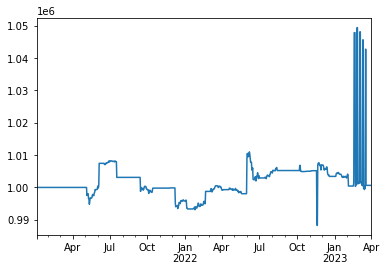

In [256]:
p=balance_df['total_value']
p.plot()

In [257]:
def risk_free_capital_gain(number_of_days,annual_risk_free_rate,starting_value):
    return (annual_risk_free_rate+1)**(number_of_days/365)*starting_value -starting_value

In [279]:
# Below I create a single function out of previous code
def strategy_metrics(balance_df,annual_risk_free_rate ):
    initial_capital = balance_df['total_value'].iloc[0]
    date_list = list(balance_df.index)
    balance_list = [initial_capital ]
    risk_free_balance_list = [initial_capital]
    for date in date_list:
        current_balance = balance_df['total_value'].loc[date]
        risk_free_balance_list.append( risk_free_balance_list[-1] + risk_free_capital_gain(1,annual_risk_free_rate, risk_free_balance_list[-1]))
        balance_list.append(current_balance)


    zeroth_date = date_list[0] - datetime.timedelta(days=1)
    new_date_list = [zeroth_date]
    for date in date_list:
        new_date_list.append(date)
    balance_df = pd.DataFrame({'balance': balance_list},index=new_date_list)
    balance_df['balance_shift'] = balance_df['balance'].shift(1)
    balance_df = balance_df.dropna()
    balance_df['daily_returns'] = (balance_df['balance'] - balance_df['balance_shift'])/balance_df['balance_shift']


    risk_free_balance_df = pd.DataFrame({'risk_free_balance': risk_free_balance_list},index=new_date_list)
    risk_free_balance_df ['risk_free_balance_shift'] = risk_free_balance_df ['risk_free_balance'].shift(1)
    risk_free_balance_df  = risk_free_balance_df .dropna()
    risk_free_balance_df ['risk_free_daily_returns'] = (risk_free_balance_df ['risk_free_balance'] - risk_free_balance_df ['risk_free_balance_shift'])/risk_free_balance_df ['risk_free_balance_shift']

    total_return = (balance_df['balance'][-1] - initial_capital)/initial_capital
    total_return_vs_risk_free = (balance_df['balance'][-1]- risk_free_balance_list[-1])/ risk_free_balance_list[-1]
    if balance_df['daily_returns'].std() > 0:
        sharpe_ratio = (balance_df['daily_returns'].mean() -risk_free_balance_df['risk_free_daily_returns'].mean())/ balance_df['daily_returns'].std()
    else:
        sharpe_ratio = np.nan
    metrics = {'number_of_days':len(date_list),'total_return':total_return,'total_return_vs_risk_free':total_return_vs_risk_free,'sharpe_ratio':sharpe_ratio}
    #    print(balance_df)
    return metrics

In [259]:
annual_risk_free_rate = 0.005
strategy_metrics(balance_df,annual_risk_free_rate )

{'number_of_days': 819,
 'total_return': 0.0006354960727691651,
 'total_return_vs_risk_free': -0.010500410751956986,
 'sharpe_ratio': 1.043922894512196e-05}

# Finding optimal parameters

In [260]:
ticker_df = pd.read_csv('nasdaq_screener_1686671592339.csv')
tickers = list(ticker_df['Symbol'].values)
tickers = tickers[0:500]
training_start_date = "2010-01-03"
training_end_date = "2021-01-01"
testing_start_date = '2021-01-03'
testing_end_date = '2023-04-01'
testing_2_start_date = '2021-01-03'
testing_2_end_date = '2023-04-01'

In [266]:
link_threshold = 0.6
frequency_threshold = 0.5
initial_capital = 1000000
investment_parameter = 0.2
link_loss_threshold = 0
drop_out_threshold = 0.8
draw = False
step = 0.5
annual_risk_free_rate = 0.005
price_df_train, daily_returns_df_train = get_data(tickers,training_start_date,training_end_date)
price_df_test,daily_returns_df_test = get_data(tickers,testing_start_date,testing_end_date )
n_time_windows = 100
size_boolean = True
chosen_time_window_size = 30
tot_days = len(price_df_train)
time_window_splits, time_window_size = split_time_windows(tot_days,n_time_windows,chosen_time_window_size,size_boolean)

0 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
1 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACI: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
2 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AACIW: Period 'max' is invalid, must be one of ['1d', '5d']
3 500
[*********************100%***********************]  1 of 1 completed
2018-02-16 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
4 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
5 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
6 500
[*********************100%********************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACON: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
52 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACONW: Period 'max' is invalid, must be one of ['1d', '5d']
53 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
54 500
[*********************100%***********************]  1 of 1 completed
2015-10-06 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
55 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ACRV: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
56 500
[*********************100%***********************]  1 of 1 completed
2011-02-11 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
57 500
[*********************100%****

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
103 500
[*********************100%***********************]  1 of 1 completed
2020-08-12 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
104 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
105 500
[*********************100%***********************]  1 of 1 completed
2013-04-26 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
106 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
107 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AFARU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
108 500
[*********************100%***************

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
154 500
[*********************100%***********************]  1 of 1 completed
2019-06-13 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
155 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AIXI: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
156 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
157 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AKAN: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
158 500
[*********************100%***********************]  1 of 1 completed
2014-03-20 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
159 500
[*********************100%

[*********************100%***********************]  1 of 1 completed
2017-11-01 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
205 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALTU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
206 500
[*********************100%***********************]  1 of 1 completed
2020-12-09 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
207 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALTUW: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
208 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALVO: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
209 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALVOW: Period 'max' is invalid, must be one of ['1d', '5d']
210 500
[******

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
256 500
[*********************100%***********************]  1 of 1 completed
2020-07-24 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
257 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
258 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
259 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ANTX: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
260 500
[*********************100%***********************]  1 of 1 completed
2013-08-12 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
261 500
[*********************100%****************

[*********************100%***********************]  1 of 1 completed
2015-07-31 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
306 500
[*********************100%***********************]  1 of 1 completed
2018-07-25 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
307 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AQU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
308 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AQUNR: Period 'max' is invalid, must be one of ['1d', '5d']
309 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AQUNU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
310 500
[*********************100%***********************]  1 of 1 completed
2014-03-21 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
311 500
[*********************10

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASCAW: Period 'max' is invalid, must be one of ['1d', '5d']
356 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASCB: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
357 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASCBU: Data doesn't exist for startDate = 1262494800, endDate = 1609477200
358 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASCBW: Period 'max' is invalid, must be one of ['1d', '5d']
359 500
[*********************100%***********************]  1 of 1 completed
2019-02-28 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
360 500
[*********************100%***********************]  1 of 1 completed
2018-05-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
361 500
[********************

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ATNFW: Period 'max' is invalid, must be one of ['1d', '5d']
406 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
407 500
[*********************100%***********************]  1 of 1 completed
2016-08-08 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
408 500
[*********************100%***********************]  1 of 1 completed
2012-11-08 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
409 500
[*********************100%***********************]  1 of 1 completed
2014-10-16 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
410 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
411 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
457 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
458 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
459 500
[*********************100%***********************]  1 of 1 completed
2019-05-09 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
460 500
[*********************100%***********************]  1 of 1 completed
2018-10-31 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
461 500
[*********************100%***********************]  1 of 1 completed
2010-01-04 00:00:00 2010-01-03 00:00:00
2020-12-31 00:00:00 2021-01-01 00:00:00
462 500
[*********************100%***********************]  1 of 1

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
8 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
9 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
10 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
11 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
12 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
13 500
[*********************100%***********************]  1 of 1 complet

[*********************100%***********************]  1 of 1 completed
2021-03-24 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
61 500
[*********************100%***********************]  1 of 1 completed
2021-06-25 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
62 500
[*********************100%***********************]  1 of 1 completed
2021-02-09 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
63 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
64 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
65 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
66 500
[*********************100%***********************]  1 of 1 compl

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
113 500
[*********************100%***********************]  1 of 1 completed
2021-02-05 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
114 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AFRIW: Period 'max' is invalid, must be one of ['1d', '5d']
115 500
[*********************100%***********************]  1 of 1 completed
2021-01-13 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
116 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
117 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
118 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2021-04-16 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
165 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
166 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
167 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
168 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALCYU: Data doesn't exist for startDate = 1609650000, endDate = 1680321600
169 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
170 500
[*********************100%***************

[*********************100%***********************]  1 of 1 completed
2021-05-05 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
217 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMAOW: Period 'max' is invalid, must be one of ['1d', '5d']
218 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
219 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
220 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
221 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
222 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
269 500
[*********************100%***********************]  1 of 1 completed
2021-09-14 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
270 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
271 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- APCXW: Period 'max' is invalid, must be one of ['1d', '5d']
272 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
273 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
274 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
321 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
322 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
323 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
324 500
[*********************100%***********************]  1 of 1 completed
2022-02-07 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
325 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AREBW: Period 'max' is invalid, must be one of ['1d', '5d']
326 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
373 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
374 500
[*********************100%***********************]  1 of 1 completed
2022-08-24 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
375 500
[*********************100%***********************]  1 of 1 completed
2021-03-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
376 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ASTLW: Period 'max' is invalid, must be one of ['1d', '5d']
377 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
378 500
[*********************100%***********************]  1 of

[*********************100%***********************]  1 of 1 completed
2021-10-29 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
425 500
[*********************100%***********************]  1 of 1 completed
2021-04-30 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
426 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AURCW: Period 'max' is invalid, must be one of ['1d', '5d']
427 500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AUROW: Period 'max' is invalid, must be one of ['1d', '5d']
428 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
429 500
[*********************100%***********************]  1 of 1 completed
2021-02-17 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
430 500
[*********************100%***********************]  1 

[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
477 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
478 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
479 500
[*********************100%***********************]  1 of 1 completed
2023-03-23 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
480 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
481 500
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
482 500
[*********************100%***********************]  1 of 1

In [299]:
step = 0.1
metric_results_dict = {}
for link_threshold in np.arange(0,1 + step,step):
    for frequency_threshold in np.arange(0,1 + step,step):
        for drop_out_threshold in np.arange(0,1 + step,step):
            for investment_parameter in np.arange(0,1 + step,step):
                print((link_threshold,frequency_threshold,drop_out_threshold,investment_parameter))
                separate_groups  = find_correlation_groups(time_window_splits,price_df_train,link_threshold,frequency_threshold ,draw)
                drop_out_chosen_dict,correlation_pairs_test_dict = find_dropout_candidates(price_df_test,time_window_splits_test,drop_out_threshold)
                signals_dictionary,current_capital=  create_signals(price_df_test,time_window_splits_test,drop_out_threshold,link_loss_threshold,initial_capital,investment_parameter)
                balance_df=timeseries(signals_dictionary,testing_start_date,testing_end_date)
                metric_results_dict[(link_threshold,frequency_threshold,drop_out_threshold,investment_parameter)] = strategy_metrics(balance_df,annual_risk_free_rate )


(0.0, 0.0, 0.0, 0.0)
0 1
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
Index(['AZN'], dtype='object')
(0.0, 0.0, 0.0, 0.1)
0 1
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
Index(['AZN'], dtype='object')
(0.0, 0.0, 0.0, 0.2)
0 1
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
Index(['AZN'], dtype='object')
(0.0, 0.0, 0.0, 0.30000000000000004)
0 1
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01 00:00:00
Index(['AZN'], dtype='object')
(0.0, 0.0, 0.0, 0.4)
0 1
[*********************100%***********************]  1 of 1 completed
2021-01-04 00:00:00 2021-01-03 00:00:00
2023-03-31 00:00:00 2023-04-01

KeyboardInterrupt: 

In [300]:
results_dict = {'parameters':[], 'total_return':[],'total_return_vs_risk_free':[],'sharpe_ratio':[]}
for parameters, one_result_dict in metric_results_dict.items():
    results_dict['parameters'].append(parameters)
    results_dict['total_return'].append( one_result_dict['total_return'])
    results_dict['total_return_vs_risk_free'].append( one_result_dict['total_return_vs_risk_free'])
    results_dict['sharpe_ratio'].append( one_result_dict['sharpe_ratio'])
results_df = pd.DataFrame(results_dict)
results_df = results_df.sort_values(by='total_return',ascending=False).reset_index(drop = True)
results_df = results_df.reset_index()
results_df = results_df.rename(columns={"index": "rank_1"})
results_df = results_df.sort_values(by='sharpe_ratio',ascending=False).reset_index(drop = True)
results_df = results_df.reset_index()
results_df = results_df.rename(columns={"index": "rank_2"})
results_df['average_rank'] = (results_df['rank_1'] + results_df['rank_2'])/2
results_df = results_df.sort_values(by='average_rank')
results_df 

rank_2  rank_1                            parameters  total_return  \
0        0       0                  (0.0, 0.0, 0.0, 1.0)      0.001250   
1        1       1                  (0.0, 0.0, 0.0, 0.9)      0.001124   
2        2       2                  (0.0, 0.0, 0.0, 0.8)      0.001000   
3        3       3   (0.0, 0.0, 0.0, 0.7000000000000001)      0.000875   
4        4       4   (0.0, 0.0, 0.0, 0.6000000000000001)      0.000750   
5        5       5                  (0.0, 0.0, 0.0, 0.5)      0.000624   
6        6       6                  (0.0, 0.0, 0.0, 0.4)      0.000500   
7        7       7  (0.0, 0.0, 0.0, 0.30000000000000004)      0.000375   
8        8       8                  (0.0, 0.0, 0.0, 0.2)      0.000250   
9        9       9                  (0.0, 0.0, 0.0, 0.1)      0.000125   
10      10      10                  (0.0, 0.0, 0.0, 0.0)      0.000000   
11      11      11                  (0.0, 0.0, 0.1, 0.0)      0.000000   

    total_return_vs_risk_free  sharpe_ratio  average_rank  
0                   -0.009893     -0.033569           0.0  
1                   -0.010017     -0.037838           1.0  
2                   -0.010140     -0.043143           2.0  
3                   -0.010264     -0.049991           3.0  
4                   -0.010388     -0.059120           4.0  
5                   -0.010511     -0.071902           5.0  
6                   -0.010634     -0.090967           6.0  
7                   -0.010758     -0.122876           7.0  
8                   -0.010882     -0.186756           8.0  
9                   -0.011006     -0.378977           9.0  
10                  -0.011129           NaN          10.0  
11                  -0.011129           NaN          11.0

In [ ]:
results_df.iloc[0]